## Sydney tornado 

In [2]:
import pyart
import pydda
import cartopy.crs as ccrs
import xarray

from dask_jobqueue import SLURMCluster
from distributed import Client
from glob import glob
from datetime import datetime
%pylab inline


## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119



/home/rjackson/.local/lib/python3.6/site-packages/pyart/graph/cm.py:104: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'red' in spec:
/home/rjackson/.local/lib/python3.6/site-packages/pyart/graph/cm_colorblind.py:32: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'red' in spec:
/home/rjackson/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/rjackson/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/rjackson/anaconda3/lib/python3.6/site-packages/docrep-0.2.3-py3.6.egg/docrep/__init__.py:24: DeprecationWarning: Flags not at the start of the expression '(?<!%

Populating the interactive namespace from numpy and matplotlib


/blues/gpfs/home/rjackson/anaconda3/envs/yt_devel/lib/python3.6/site-packages/ipython-6.5.0-py3.6.egg/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['datetime']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [3]:
rad1_files = sorted(glob('/lcrc/group/earthscience/rjackson/sydney_tornado/KURNELL/DATA/4002*.nc'))
rad2_files = sorted(glob('/lcrc/group/earthscience/rjackson/sydney_tornado/KURNELL/DATA/402*.nc'))
rad3_files = sorted(glob('/lcrc/group/earthscience/rjackson/sydney_tornado/KURNELL/DATA/5402*.nc'))
rad4_files = sorted(glob('/lcrc/group/earthscience/rjackson/sydney_tornado/KURNELL/DATA/7102*.nc'))

In [190]:
rad1 = pyart.io.read(rad1_files[5])
rad2 = pyart.io.read(rad2_files[5])
rad3 = pyart.io.read(rad3_files[5])
rad4 = pyart.io.read(rad4_files[5])
disp1 = pyart.graph.RadarMapDisplayCartopy(rad1)
disp2 = pyart.graph.RadarMapDisplayCartopy(rad2)
disp3 = pyart.graph.RadarMapDisplayCartopy(rad3)
disp4 = pyart.graph.RadarMapDisplayCartopy(rad4)

In [191]:
pyart.graph.RadarMapDisplayCartopy.plot_ppi_map?

(149.5, 152.0)

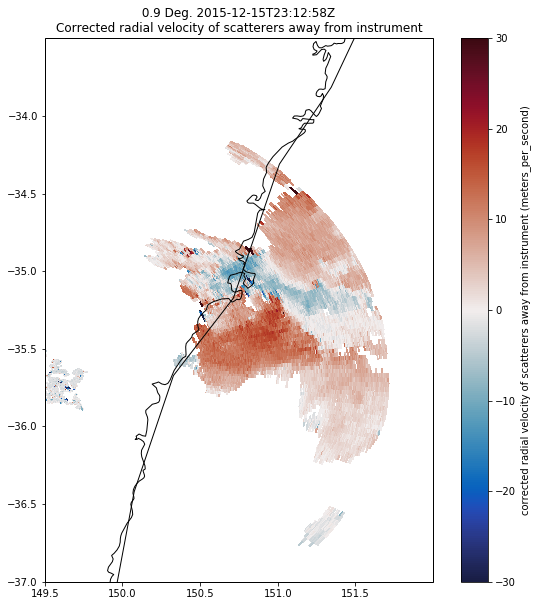

In [192]:
gf1 = pyart.filters.GateFilter(rad1)
gf1 = pyart.correct.despeckle_field(rad1, field='VRADH_corr', size=100, gatefilter=gf1)
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection=ccrs.PlateCarree())
disp1.plot_ppi_map('VRADH_corr', 1, vmin=-30, vmax=30, cmap='pyart_balance', gatefilter=gf1, 
                   projection=ccrs.PlateCarree(), ax=ax)
ax.coastlines('10m')
ax.set_xticks(np.arange(147, 152, 0.5))
ax.set_yticks(np.arange(-37.5, -33.5, 0.5))
ax.set_ylim([-37, -33.5])
ax.set_xlim([149.5, 152.0])

/home/rjackson/.local/lib/python3.6/site-packages/pyart/core/radar.py:550: UserWarning: Warning: converting a masked element to nan.
  return float(nyq_vel[0])
/home/rjackson/.local/lib/python3.6/site-packages/pyart/util/sigmath.py:62: RuntimeWarning: invalid value encountered in sqrt
  std_dev = np.sqrt(-2 * np.log(norm)) * (half_width) / np.pi
/home/rjackson/.local/lib/python3.6/site-packages/pyart/filters/gatefilter.py:630: RuntimeWarning: invalid value encountered in greater
  marked = self._get_fdata(field) > value


(149.5, 152.0)

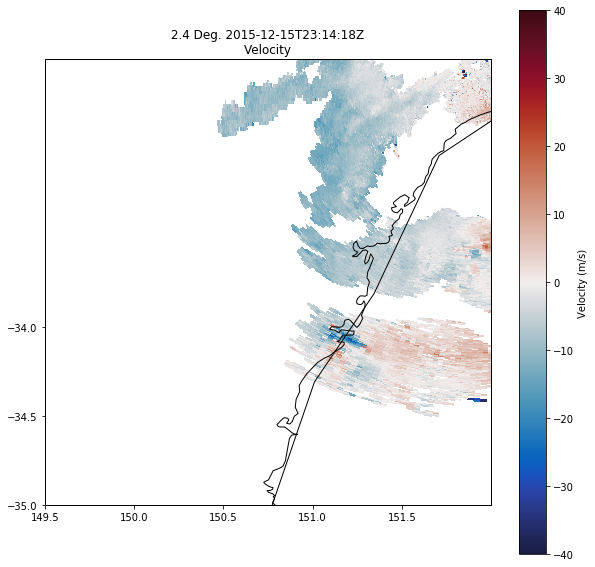

In [193]:
gf2 = pyart.filters.GateFilter(rad2)
gf2 = pyart.correct.despeckle_field(rad2, field='VRADH_corr', size=100, gatefilter=gf2)
texture = pyart.retrieve.calculate_velocity_texture(rad2, vel_field='VRADH')
rad2.add_field('texture', texture, replace_existing=True)
gf2.exclude_above('texture', 2)
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection=ccrs.PlateCarree())
disp2.plot_ppi_map('VRADH', 4, vmin=-40, vmax=40, cmap='pyart_balance',  
                   projection=ccrs.PlateCarree(), ax=ax, gatefilter=gf2)
ax.coastlines('10m')
ax.set_xticks(np.arange(147, 152, 0.5))
ax.set_yticks(np.arange(-37.5, -33.5, 0.5))
ax.set_ylim([-35, -32.5])
ax.set_xlim([149.5, 152.0])

(150.5, 152.0)

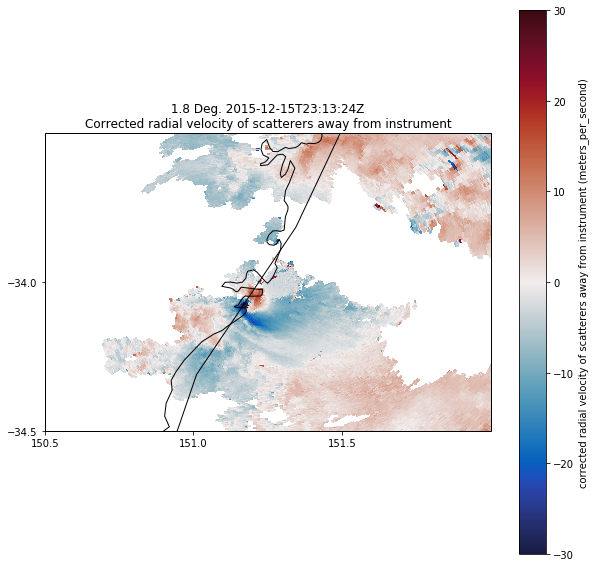

In [197]:
gf3 = pyart.filters.GateFilter(rad3)
gf3 = pyart.correct.despeckle_field(rad3, field='DBZH', size=100, gatefilter=gf3)
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection=ccrs.PlateCarree())
disp3.plot_ppi_map('VRADH_corr', 3, vmin=-30, vmax=30, cmap='pyart_balance', gatefilter=gf3, 
                   projection=ccrs.PlateCarree(), ax=ax)
ax.coastlines('10m')
ax.set_xticks(np.arange(147, 152, 0.5))
ax.set_yticks(np.arange(-37.5, -33.5, 0.5))
ax.set_ylim([-34.5, -33.5])
ax.set_xlim([150.5, 152.0])

/home/rjackson/.local/lib/python3.6/site-packages/pyart/core/radar.py:550: UserWarning: Warning: converting a masked element to nan.
  return float(nyq_vel[0])
/home/rjackson/.local/lib/python3.6/site-packages/pyart/util/sigmath.py:62: RuntimeWarning: invalid value encountered in sqrt
  std_dev = np.sqrt(-2 * np.log(norm)) * (half_width) / np.pi
/home/rjackson/.local/lib/python3.6/site-packages/pyart/filters/gatefilter.py:630: RuntimeWarning: invalid value encountered in greater
  marked = self._get_fdata(field) > value


(150.5, 152.0)

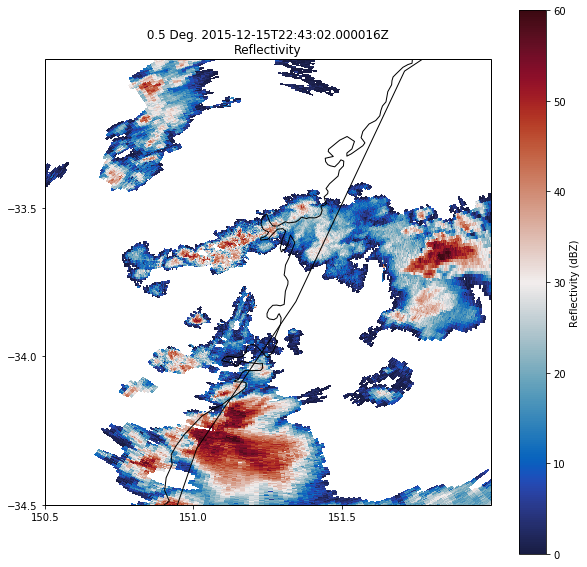

In [123]:
gf4 = pyart.filters.GateFilter(rad4)
texture = pyart.retrieve.calculate_velocity_texture(rad4, vel_field='VRADH')
rad4.add_field('texture', texture, replace_existing=True)
gf4.exclude_above('texture', 4)
gf4.exclude_below('DBZH', 0)
gf4 = pyart.correct.despeckle_field(rad4, field='VRADH_corr', size=100, gatefilter=gf4)
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection=ccrs.PlateCarree())
disp4.plot_ppi_map('DBZH', 0, vmin=0, vmax=60, cmap='pyart_balance', gatefilter=gf4, 
                   projection=ccrs.PlateCarree(), ax=ax)
ax.coastlines('10m')
ax.set_xticks(np.arange(147, 152, 0.5))
ax.set_yticks(np.arange(-37.5, -33.0, 0.5))
ax.set_ylim([-34.5, -33.0])
ax.set_xlim([150.5, 152.0])

In [128]:
grid1 = pyart.map.grid_from_radars(rad1,(21,356,151),
                   ((0.,20000.),(-50000.,300000.),(100000.,250000.)),
                   fields=['DBZH','VRADH_corr'],
                   refl_field='DBZH',roi_func='dist_beam',
                   h_factor=0,nb=0.6,bsp=1.,min_radius=750.,
                   grid_origin=(rad1.latitude['data'], rad1.longitude['data']),
                   gatefilter=gf1)

grid2 = pyart.map.grid_from_radars(rad2,(21,356,151),
                   ((0.,20000.),(-50000.,300000.),(100000.,250000.)),
                   fields=['DBZH','VRADH_corr'],
                   refl_field='DBZH',roi_func='dist_beam',
                   h_factor=0,nb=0.6,bsp=1.,min_radius=750.,
                   grid_origin=(rad1.latitude['data'], rad1.longitude['data']),
                   gatefilter=gf2)
grid3 = pyart.map.grid_from_radars(rad3,(21,356,151),
                   ((0.,20000.),(-50000.,300000.),(100000.,250000.)),
                   fields=['DBZH','VRADH_corr'],
                   refl_field='DBZH',roi_func='dist_beam',
                   h_factor=0,nb=0.6,bsp=1.,min_radius=750.,
                   grid_origin=(rad1.latitude['data'], rad1.longitude['data']),
                   gatefilter=gf3)
rad4.fields['DBZH']['data'] = np.ma.masked_where(gf4.gate_excluded, rad4.fields['DBZH']['data'])
grid4 = pyart.map.grid_from_radars(rad4,(21,356,151),
                   ((0.,20000.),(-50000.,300000.),(100000.,250000.)),
                   fields=['DBZH','VRADH_corr'],
                   refl_field='DBZH',roi_func='dist_beam',
                   h_factor=0,nb=0.6,bsp=1.,min_radius=750.,
                   grid_origin=(rad1.latitude['data'], rad1.longitude['data']),
                   gatefilter=gf4
                   )

In [129]:
disp_grid1 = pyart.graph.GridMapDisplay(grid1)
disp_grid2 = pyart.graph.GridMapDisplay(grid2)
disp_grid3 = pyart.graph.GridMapDisplay(grid3)
disp_grid4 = pyart.graph.GridMapDisplay(grid4)

/home/rjackson/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1303: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  b = np.array(np.fromstring(polystring,dtype='<f4'),'f8')
/home/rjackson/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1303: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  b = np.array(np.fromstring(polystring,dtype='<f4'),'f8')
/home/rjackson/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1303: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  b = np.array(np.fromstring(polystring,dtype='<f4'),'f8')
/home/rjackson/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1303: DeprecationWarning: The binary mode of fromstring is 

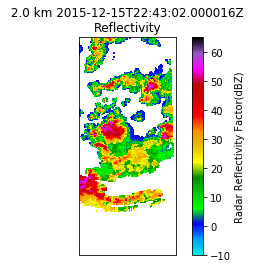

In [130]:
disp_grid4.plot_grid('DBZH', 2)

In [18]:
weights_obs = np.where(np.logical_or.reduce((np.logical_and(grid1.fields['VRADH_corr']['data'].mask == False,
                                                           grid3.fields['VRADH_corr']['data'].mask == False),
                                            np.logical_and(grid1.fields['VRADH_corr']['data'].mask == False,
                                                           grid4.fields['VRADH_corr']['data'].mask == False),
                                            np.logical_and(grid3.fields['VRADH_corr']['data'].mask == False,
                                                           grid4.fields['VRADH_corr']['data'].mask == False)))
                                            , 1, 0)

In [107]:
vad = pyart.retrieve.velocity_azimuth_display(rad1, vel_field='VRADH_corr', gatefilter=gf1,
                                              z_want=np.linspace(200, 20000, 100))
u_init, v_init, w_init = pydda.initialization.make_wind_field_from_profile(grid1, vad,
                                                                           vel_field='VRADH_corr')

# Use VAD as initialization
new_grids = pydda.retrieval.get_dd_wind_field([grid1, grid2, grid3, grid4], u_init, v_init, w_init,
                                              vel_name='VRADH_corr', Co=1, refl_field='DBZH',
                                              mask_outside_opt=True, filt_iterations=0,
                                              )

max height 7889.556620223448 meters
max height 9978.10441803746 meters
max height 12065.910484038293 meters
max height 14674.47088589333 meters
max height 17802.727039540187 meters
max height 21449.148896990344 meters
max height 27171.010057607666 meters
max height 34435.905035723 meters
max height 43741.28933187947 meters
max height 57095.378020495176 meters
max height 73858.4367634058 meters
max height 96781.61011474952 meters
max height 125689.66655620374 meters
max height 162437.36900097504 meters
Calculating weights for radars 0 and 1
Calculating weights for radars 0 and 2
Calculating weights for radars 1 and 2
Calculating weights for models...
Starting solver 
rmsVR = 52.391018066072455
Total points:640547.0
| Jvel    | Jmass   | Jsmooth |   Jbg   | Jvort   | Jmodel | Max w  
| 365.8550| 114.3170|   0.0000|   0.0000|   0.0000|   0.0000|  84.3679
Norm of gradient: 0.039847924894597694
Iterations before filter: 10
| Jvel    | Jmass   | Jsmooth |   Jbg   | Jvort   | Jmodel | Max w  

In [ ]:
vad.height

NameError: name 'new_grids' is not defined

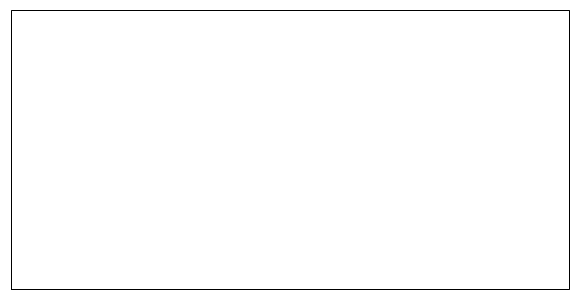

In [3]:
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection=ccrs.PlateCarree())
pydda.vis.plot_horiz_xsection_quiver_map(new_grids, ax=ax, background_field='DBZH', level=2,
                                         show_lobes=False, bg_grid_no=-1, vmin=0, vmax=60,
                                         w_vel_contours=[3, 5, 10],
                                         quiver_spacing_x_km=5.0,
                                         quiver_spacing_y_km=5.0, quiverkey_len=20.0)
ax.set_xticks(np.arange(149.5, 152.5, 0.5))
ax.set_yticks(np.arange(-36.25, -33.25, 0.5))

In [114]:
pydda.vis.plot_horiz_xsection_quiver_map?

In [ ]:
datetime.datetime.strptime(rad1.time['units'], 'seconds since %Y-%m-%dT%H:%M:%SZ')

In [4]:
grid_path = '/lcrc/group/earthscience/rjackson/sydney_tornado/grids/'
quicklook_path = '/lcrc/group/earthscience/rjackson/sydney_tornado/quicklooks/'

def retrieve_winds2(i):
    rad1 = pyart.io.read(rad1_files[i])
    rad2 = pyart.io.read(rad2_files[i])
    rad3 = pyart.io.read(rad3_files[i])
    rad4 = pyart.io.read(rad4_files[i])
    gf1 = pyart.filters.GateFilter(rad1)
    gf2 = pyart.filters.GateFilter(rad2)
    gf3 = pyart.filters.GateFilter(rad3)
    gf4 = pyart.filters.GateFilter(rad4)
    gf1.exclude_below('DBZH', 0)
    gf2.exclude_below('DBZH', 0)
    gf3.exclude_below('DBZH', 0)
    gf4.exclude_below('DBZH', 0)
    gf1 = pyart.correct.despeckle_field(rad1, field='VRADH_corr', size=100, gatefilter=gf1)
    gf2 = pyart.correct.despeckle_field(rad2, field='VRADH_corr', size=100, gatefilter=gf2)
    gf3 = pyart.correct.despeckle_field(rad3, field='VRADH_corr', size=100, gatefilter=gf3)
    gf4 = pyart.correct.despeckle_field(rad4, field='VRADH_corr', size=100, gatefilter=gf4)
    rad1.fields['DBZH']['data'] = np.ma.masked_where(gf1.gate_excluded, rad1.fields['DBZH']['data'])
    rad1.fields['VRADH_corr']['data'] = np.ma.masked_where(gf1.gate_excluded, rad1.fields['VRADH_corr']['data'])
    grid1 = pyart.map.grid_from_radars(rad1,(21,356,151),
                   ((0.,20000.),(-50000.,300000.),(100000.,250000.)),
                   fields=['DBZH','VRADH_corr'],
                   refl_field='DBZH',roi_func='dist_beam',
                   h_factor=0,nb=0.6,bsp=1.,min_radius=750.,
                   grid_origin=(rad1.latitude['data'], rad1.longitude['data']),
                   gatefilter=gf1)
    rad2.fields['DBZH']['data'] = np.ma.masked_where(gf2.gate_excluded, rad2.fields['DBZH']['data'])
    rad2.fields['VRADH_corr']['data'] = np.ma.masked_where(gf2.gate_excluded, rad2.fields['VRADH_corr']['data'])
    grid2 = pyart.map.grid_from_radars(rad2,(21,356,151),
                   ((0.,20000.),(-50000.,300000.),(100000.,250000.)),
                   fields=['DBZH','VRADH_corr'],
                   refl_field='DBZH',roi_func='dist_beam',
                   h_factor=0,nb=0.6,bsp=1.,min_radius=750.,
                   grid_origin=(rad1.latitude['data'], rad1.longitude['data']),
                   gatefilter=gf2)
    rad3.fields['DBZH']['data'] = np.ma.masked_where(gf3.gate_excluded, rad3.fields['DBZH']['data'])
    rad3.fields['VRADH_corr']['data'] = np.ma.masked_where(gf3.gate_excluded, rad3.fields['VRADH_corr']['data'])
    grid3 = pyart.map.grid_from_radars(rad3,(21,356,151),
                   ((0.,20000.),(-50000.,300000.),(100000.,250000.)),
                   fields=['DBZH','VRADH_corr'],
                   refl_field='DBZH',roi_func='dist_beam',
                   h_factor=0,nb=0.6,bsp=1.,min_radius=750.,
                   grid_origin=(rad1.latitude['data'], rad1.longitude['data']),
                   gatefilter=gf3)
    rad4.fields['DBZH']['data'] = np.ma.masked_where(gf4.gate_excluded, rad4.fields['DBZH']['data'])
    rad4.fields['VRADH_corr']['data'] = np.ma.masked_where(gf4.gate_excluded, rad4.fields['VRADH_corr']['data'])
    grid4 = pyart.map.grid_from_radars(rad4,(21,356,151),
                   ((0.,20000.),(-50000.,300000.),(100000.,250000.)),
                   fields=['DBZH','VRADH_corr'],
                   refl_field='DBZH',roi_func='dist_beam',
                   h_factor=0,nb=0.6,bsp=1.,min_radius=750.,
                   grid_origin=(rad1.latitude['data'], rad1.longitude['data']),
                   gatefilter=gf4
                   )
    vad = pyart.retrieve.velocity_azimuth_display(rad1, vel_field='VRADH_corr', gatefilter=gf1,
                                              z_want=np.linspace(200, 20000, 100))
    u_init, v_init, w_init = pydda.initialization.make_wind_field_from_profile(grid1, vad,
                                                                               vel_field='VRADH_corr')
    rad_time = datetime.datetime.strptime(rad1.time['units'], 'seconds since %Y-%m-%dT%H:%M:%SZ')
    # Use VAD as initialization
    new_grids = pydda.retrieval.get_dd_wind_field([grid1, grid2, grid3, grid4], u_init, v_init, w_init,
                                                  vel_name='VRADH_corr', Co=1, refl_field='DBZH',
                                                  mask_outside_opt=True)
    date_str = ("%04d" % rad_time.year + "%02d" % rad_time.month + "%02d" % rad_time.day +
                "%02d" % rad_time.hour + "%02d" % rad_time.minute + "%02d" % rad_time.second)
    pyart.io.write_grid(grid_path + 'grid1' + date_str + '.nc', new_grids[0])
    pyart.io.write_grid(grid_path + 'grid2' + date_str + '.nc', new_grids[1])
    pyart.io.write_grid(grid_path + 'grid3' + date_str + '.nc', new_grids[2])
    pyart.io.write_grid(grid_path + 'grid4' + date_str + '.nc', new_grids[3])
    
    fig = plt.figure(figsize=(10,10))
    ax = plt.axes(projection=ccrs.PlateCarree())
    pydda.vis.plot_horiz_xsection_quiver_map(new_grids, ax=ax, background_field='DBZH', level=2,
                                             show_lobes=False, bg_grid_no=-1, vmin=0.1, vmax=60,
                                             w_vel_contours=[3,5,10], quiverkey_len=10.0)
    ax.set_xticks(np.arange(147, 152, 0.5))
    ax.set_yticks(np.arange(-37.5, -33.0, 0.5))
    ax.set_ylim([-36, -33.0])
    ax.set_xlim([149.5, 152.0])
    plt.savefig(quicklook_path + 'quicklook' + date_str + '.png')

In [13]:
len(rad1_files)

12

In [133]:
cluster = SLURMCluster(time='1:00:00', processes=2, cores=2, memory='128 GB')

In [148]:
cluster.scale(4)

In [135]:
client = Client(cluster)

In [150]:
client

Client Scheduler: tcp://140.221.70.6:38975 Dashboard: http://140.221.70.6:33160/status,Cluster Workers: 4 Cores: 4 Memory: 256.00 GB


In [151]:
futures = client.map(retrieve_winds2, range(0, 12))

In [152]:
from distributed import progress

In [153]:
progress(futures)

/home/rjackson/anaconda3/lib/python3.6/site-packages/ipywidgets/widgets/widget.py:494: DeprecationWarning: The 'warn' method is deprecated, use 'warning' instead
  self.log.warn(message)
Widget Javascript not detected.  It may not be installed or enabled properly.


/blues/gpfs/home/rjackson/anaconda3/envs/yt_devel/lib/python3.6/site-packages/traitlets-4.3.2-py3.6.egg/traitlets/config/configurable.py:73: DeprecationWarning: Passing unrecoginized arguments to super(FloatProgress).__init__(height='10px').
object.__init__() takes no parameters
This is deprecated in traitlets 4.2.This error will be raised in a future release of traitlets.
  super(Configurable, self).__init__(**kwargs)
/blues/gpfs/home/rjackson/anaconda3/envs/yt_devel/lib/python3.6/site-packages/traitlets-4.3.2-py3.6.egg/traitlets/config/configurable.py:73: DeprecationWarning: Passing unrecoginized arguments to super(HTML).__init__(width='140px').
object.__init__() takes no parameters
This is deprecated in traitlets 4.2.This error will be raised in a future release of traitlets.
  super(Configurable, self).__init__(**kwargs)


/home/rjackson/.local/lib/python3.6/site-packages/pyart/io/cfradial.py:376: UserWarning: WARNING: valid_min not used since it
cannot be safely cast to variable data type
  data = self.ncvar[:]
/home/rjackson/.local/lib/python3.6/site-packages/pyart/io/cfradial.py:376: UserWarning: WARNING: valid_max not used since it
cannot be safely cast to variable data type
  data = self.ncvar[:]
/home/rjackson/.local/lib/python3.6/site-packages/pydda-0.2.0-py3.6.egg/pydda/vis/quiver_plot.py:478: RuntimeWarning: invalid value encountered in less
  w_filled = np.ma.masked_where(w[level, :, :] < np.min(w_vel_contours),
/blues/gpfs/home/rjackson/anaconda3/envs/yt_devel/lib/python3.6/site-packages/matplotlib/contour.py:902: UserWarning: linewidths is ignored by contourf
  warnings.warn('linewidths is ignored by contourf')
/home/rjackson/.local/lib/python3.6/site-packages/pydda-0.2.0-py3.6.egg/pydda/vis/quiver_plot.py:535: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interp

/home/rjackson/.local/lib/python3.6/site-packages/pyart/io/cfradial.py:376: UserWarning: WARNING: valid_min not used since it
cannot be safely cast to variable data type
  data = self.ncvar[:]
/home/rjackson/.local/lib/python3.6/site-packages/pyart/io/cfradial.py:376: UserWarning: WARNING: valid_max not used since it
cannot be safely cast to variable data type
  data = self.ncvar[:]
/home/rjackson/.local/lib/python3.6/site-packages/pydda-0.2.0-py3.6.egg/pydda/vis/quiver_plot.py:478: RuntimeWarning: invalid value encountered in less
  w_filled = np.ma.masked_where(w[level, :, :] < np.min(w_vel_contours),
/blues/gpfs/home/rjackson/anaconda3/envs/yt_devel/lib/python3.6/site-packages/matplotlib/contour.py:902: UserWarning: linewidths is ignored by contourf
  warnings.warn('linewidths is ignored by contourf')
/home/rjackson/.local/lib/python3.6/site-packages/pydda-0.2.0-py3.6.egg/pydda/vis/quiver_plot.py:535: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interp

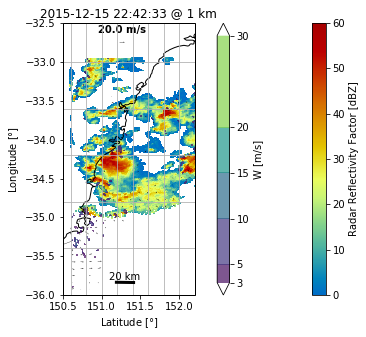

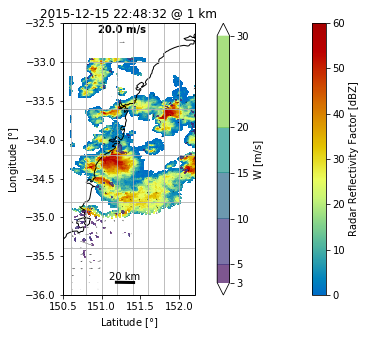

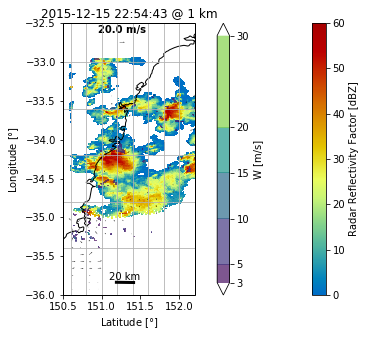

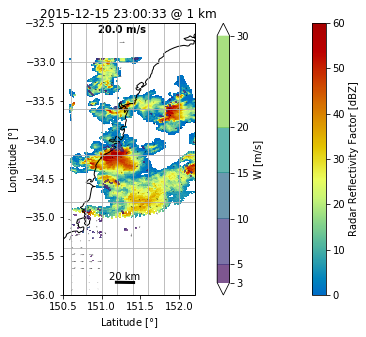

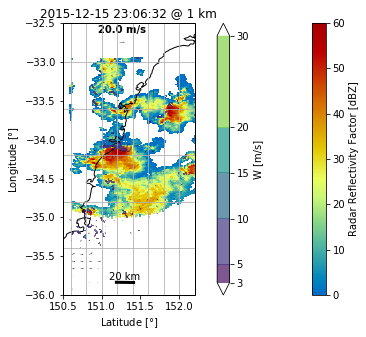

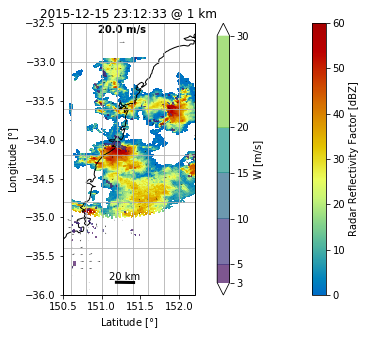

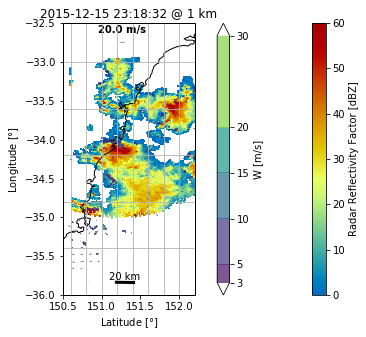

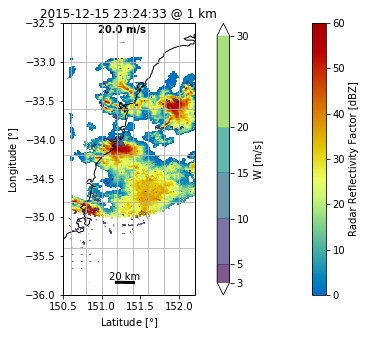

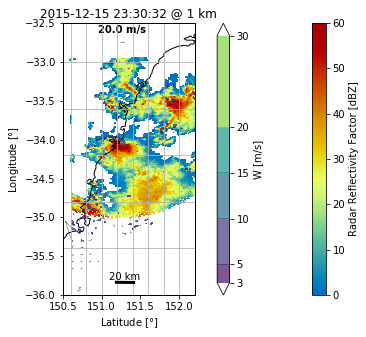

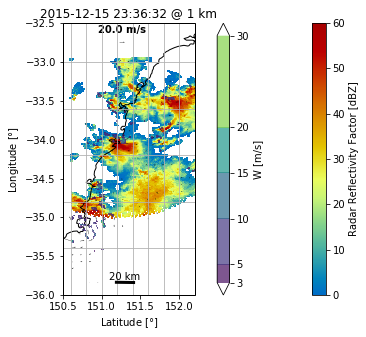

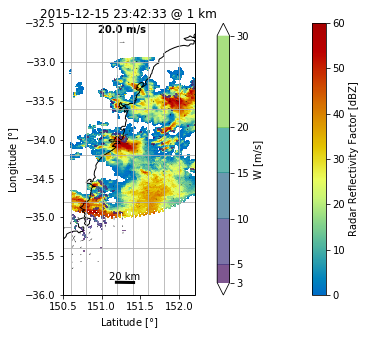

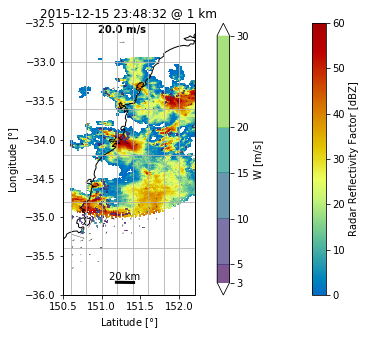

In [21]:
for files in rad1_files:
    rad1 = pyart.io.read(files)
    rad_time = datetime.datetime.strptime(rad1.time['units'], 'seconds since %Y-%m-%dT%H:%M:%SZ')
    date_str = ("%04d" % rad_time.year + "%02d" % rad_time.month + "%02d" % rad_time.day +
                "%02d" % rad_time.hour + "%02d" % rad_time.minute + "%02d" % rad_time.second)

    grid1 = pyart.io.read_grid(grid_path + 'grid1' + date_str + '.nc')
    grid2 = pyart.io.read_grid(grid_path + 'grid2' + date_str + '.nc')
    grid3 = pyart.io.read_grid(grid_path + 'grid3' + date_str + '.nc')
    grid4 = pyart.io.read_grid(grid_path + 'grid4' + date_str + '.nc')

    fig = plt.figure(figsize=(10, 5))
    ax = plt.axes(projection=ccrs.PlateCarree())
    new_grids = [grid1, grid2, grid3, grid4]

    pydda.vis.plot_horiz_xsection_quiver_map(new_grids, ax=ax, background_field='DBZH', level=1,
                                             show_lobes=False, bg_grid_no=3, vmin=0, vmax=60,
                                             w_vel_contours=[3,5,10,15,20,30], quiverkey_len=20.0,
                                             quiver_spacing_x_km=10.0, quiver_spacing_y_km=10.0,
                                             quiverkey_loc='top', colorbar_contour_flag=True,
                                             cmap='pyart_HomeyerRainbow')
    ax.set_xticks(np.arange(150.5, 153, 0.5))
    ax.set_yticks(np.arange(-36, -32.0, 0.5))
    ax.set_xlim([150.5, 152.2])
    ax.set_ylim([-36, -32.5])
    vt = new_grids[3].fields["DBZH"]["data"]
    vt_max = vt[2]
    grid_lat = new_grids[0].point_latitude["data"][0]
    grid_lon = new_grids[0].point_longitude["data"][0]
    vt_max = np.ma.masked_where(grid_lat > -33.9, vt_max)
    ind = np.argmax(vt_max)
    center_lon = grid_lon.flatten()[ind]
    center_lat = grid_lat.flatten()[ind]
    scale_bar(ax, length=20, location=(0.5, 0.05))
    ax.set_title((str(rad_time) + ' @ 1 km'))
    plt.savefig(('/lcrc/group/earthscience/rjackson/sydney_tornado/quicklooks/' + 
                 files[-16:-3] + '.png'))

In [6]:
def scale_bar(ax, length, location=(0.5, 0.05), linewidth=3):
    """
    ax is the axes to draw the scalebar on.
    location is center of the scalebar in axis coordinates ie. 0.5 is the middle of the plot
    length is the length of the scalebar in km.
    linewidth is the thickness of the scalebar.
    """
    #Projection in metres, need to change this to suit your own figure
    utm = ccrs.UTM(56)
    #Get the extent of the plotted area in coordinates in metres
    x0, x1, y0, y1 = ax.get_extent(utm)
    #Turn the specified scalebar location into coordinates in metres
    sbcx, sbcy = x0 + (x1 - x0) * location[0], y0 + (y1 - y0) * location[1]
    #Generate the x coordinate for the ends of the scalebar
    bar_xs = [sbcx - length * 500, sbcx + length * 500]
    #Plot the scalebar
    ax.plot(bar_xs, [sbcy, sbcy], transform=utm, color='k', linewidth=linewidth)
    #Plot the scalebar label
    ax.text(sbcx, sbcy, str(length) + ' km', transform=utm,
            horizontalalignment='center', verticalalignment='bottom')

In [155]:
cluster.stop_all_jobs()

In [87]:
pydda.vis.plot_horiz_xsection_quiver_map?

## View Alain's retrieval

In [3]:
retrieval_path = '/lcrc/group/earthscience/rjackson/sydney_tornado/KURNELL/3DWIND/*.nc'
file_list = sorted(glob(retrieval_path))

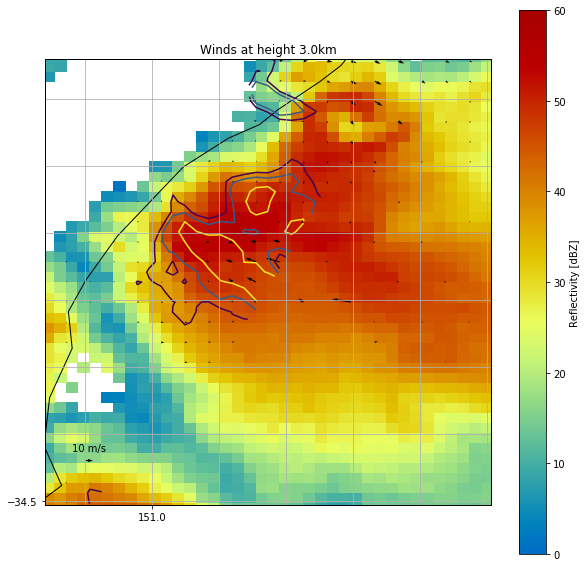

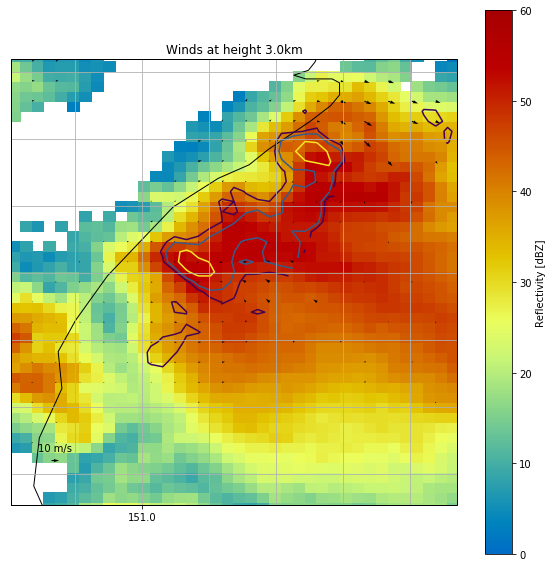

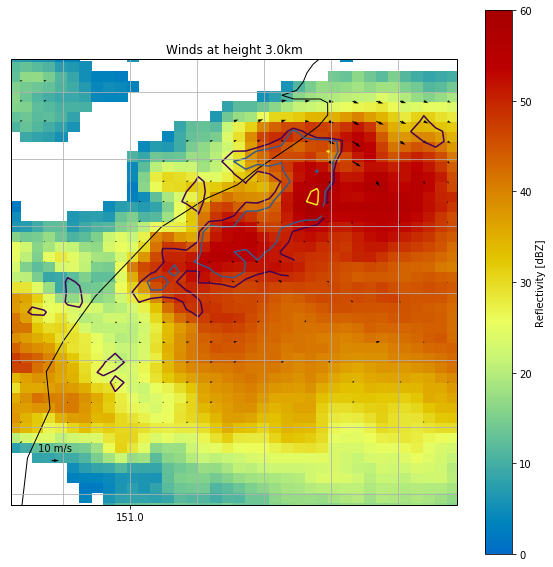

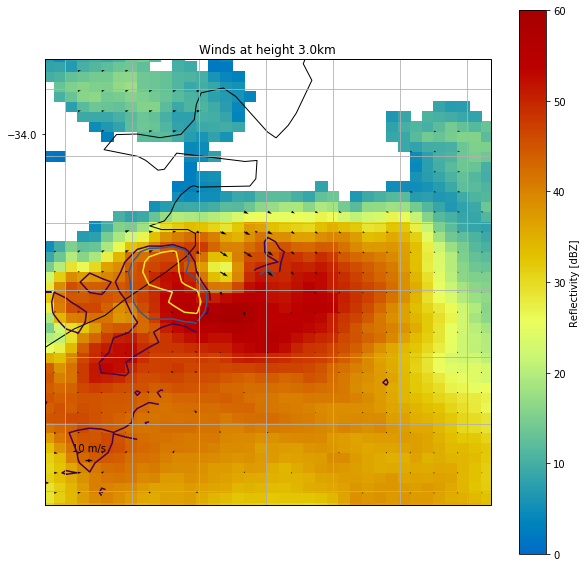

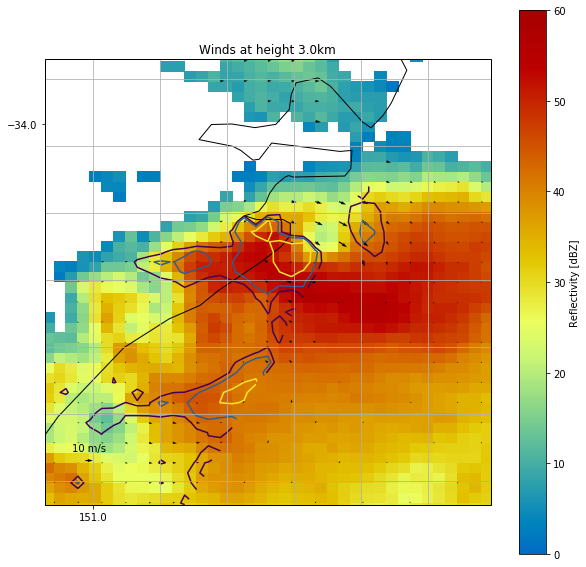

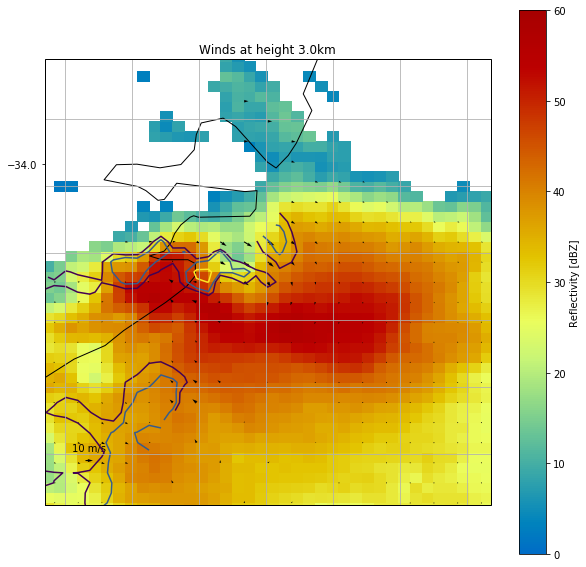

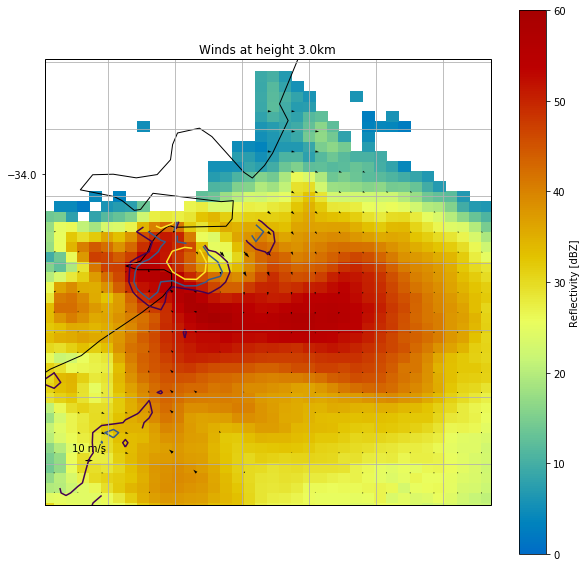

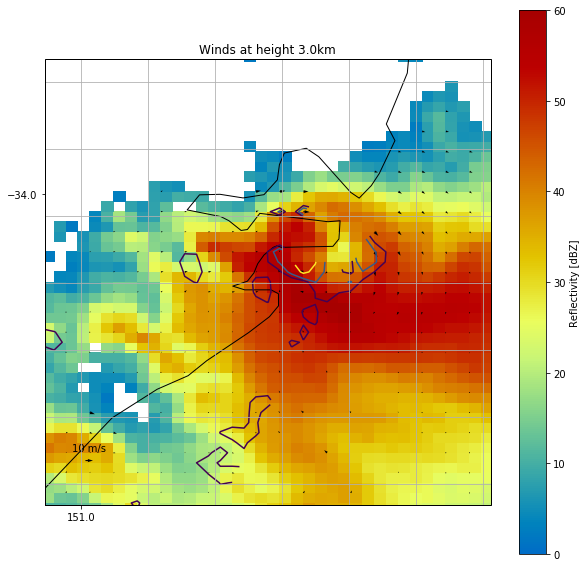

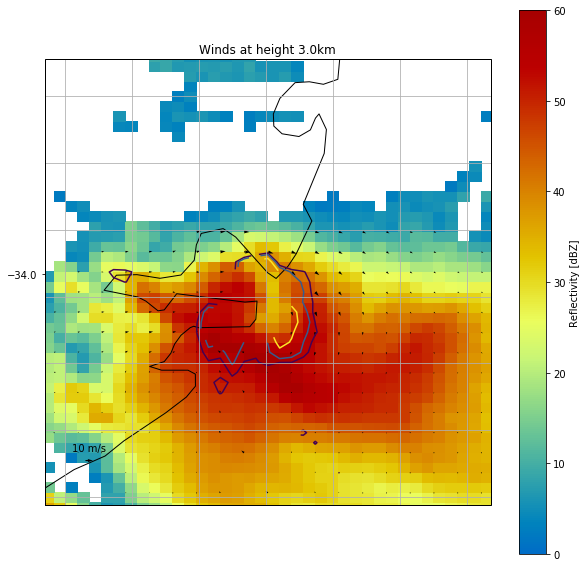

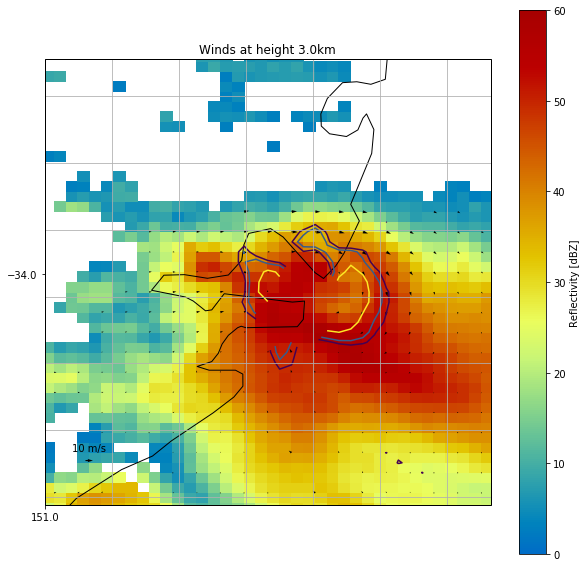

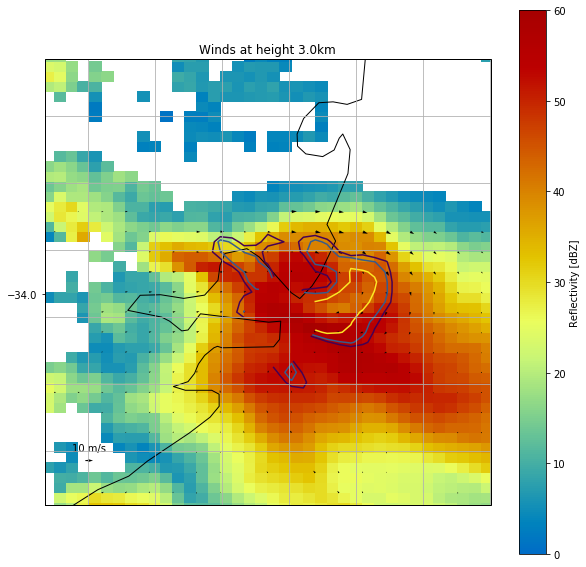

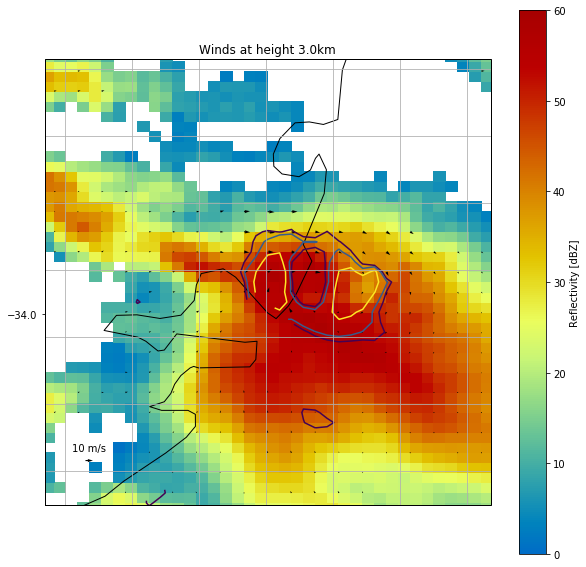

In [17]:
for file in file_list:
    the_ds = xarray.open_dataset(file)
    grid_lon, grid_lat = np.meshgrid(the_ds.longitude.values, the_ds.latitude.values)
    u = the_ds.vx.values
    v = the_ds.vy.values
    w = the_ds.vz.values
    u = np.ma.masked_where(u == -999, u)
    v = np.ma.masked_where(v == -999, v)
    w = np.ma.masked_where(w == -999, w)
    vt = the_ds.Z_R1_INTERP.values[:,:,:]
    vt = np.ma.masked_where(vt == -999, vt)
    fig = plt.figure(figsize=(10,10))
    ax = plt.axes(projection=ccrs.PlateCarree())
    level=14
    ax.set_extent([grid_lon.min(), grid_lon.max(), grid_lat.min(), grid_lat.max()])
    mesh = ax.pcolormesh(grid_lon, grid_lat, vt[level], cmap='pyart_HomeyerRainbow', vmin=0, vmax=60)
    q = ax.quiver(grid_lon[::2,::2], grid_lat[::2,::2], u[level, ::2, ::2], 
                  v[level, ::2, ::2], transform=ccrs.PlateCarree())
    ax.contour(grid_lon, grid_lat, w[level], levels=[3,5,10])
    plt.colorbar(mesh, ax=ax, label='Reflectivity [dBZ]')
    ax.coastlines(resolution='10m')
    ax.set_title(('Winds at height ' + str(the_ds.height.values[level]) + 'km'))
    ax.gridlines()
    ax.quiverkey(q, 0.1, 0.1, 30, label='10 m/s')
    ax.set_xticks(np.arange(147, 152, 0.5))
    ax.set_yticks(np.arange(-37.5, -33.0, 0.5))
    vt_max = w.max(axis=0)
    vt_max = np.ma.masked_where(grid_lat > -33.9, vt_max)
    ind = np.argmax(vt_max)
    center_lon = grid_lon.flatten()[ind]
    center_lat = grid_lat.flatten()[ind]
    ax.set_ylim([center_lat-0.2, center_lat+0.2])
    ax.set_xlim([center_lon-0.2, center_lon+0.2])
    plt.savefig(('/lcrc/group/earthscience/rjackson/sydney_tornado/alain_retrieval_quicklooks/' + 
                 file[-16:-3] + '.png'))

/home/rjackson/.local/lib/python3.6/site-packages/pyart/io/cfradial.py:376: UserWarning: WARNING: valid_min not used since it
cannot be safely cast to variable data type
  data = self.ncvar[:]
/home/rjackson/.local/lib/python3.6/site-packages/pyart/io/cfradial.py:376: UserWarning: WARNING: valid_max not used since it
cannot be safely cast to variable data type
  data = self.ncvar[:]


(203,)
(153,)


/blues/gpfs/home/rjackson/anaconda3/envs/yt_devel/lib/python3.6/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in sqrt
/home/rjackson/.local/lib/python3.6/site-packages/pyart/io/cfradial.py:376: UserWarning: WARNING: valid_min not used since it
cannot be safely cast to variable data type
  data = self.ncvar[:]
/home/rjackson/.local/lib/python3.6/site-packages/pyart/io/cfradial.py:376: UserWarning: WARNING: valid_max not used since it
cannot be safely cast to variable data type
  data = self.ncvar[:]


(203,)
(153,)


/blues/gpfs/home/rjackson/anaconda3/envs/yt_devel/lib/python3.6/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in sqrt
/home/rjackson/.local/lib/python3.6/site-packages/pyart/io/cfradial.py:376: UserWarning: WARNING: valid_min not used since it
cannot be safely cast to variable data type
  data = self.ncvar[:]
/home/rjackson/.local/lib/python3.6/site-packages/pyart/io/cfradial.py:376: UserWarning: WARNING: valid_max not used since it
cannot be safely cast to variable data type
  data = self.ncvar[:]


(203,)
(153,)


/blues/gpfs/home/rjackson/anaconda3/envs/yt_devel/lib/python3.6/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in sqrt


(203,)
(153,)


/blues/gpfs/home/rjackson/anaconda3/envs/yt_devel/lib/python3.6/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in sqrt


(203,)
(153,)


/blues/gpfs/home/rjackson/anaconda3/envs/yt_devel/lib/python3.6/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in sqrt


(203,)
(153,)


/blues/gpfs/home/rjackson/anaconda3/envs/yt_devel/lib/python3.6/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in sqrt
/home/rjackson/.local/lib/python3.6/site-packages/pyart/io/cfradial.py:376: UserWarning: WARNING: valid_min not used since it
cannot be safely cast to variable data type
  data = self.ncvar[:]
/home/rjackson/.local/lib/python3.6/site-packages/pyart/io/cfradial.py:376: UserWarning: WARNING: valid_max not used since it
cannot be safely cast to variable data type
  data = self.ncvar[:]


(203,)
(153,)


/blues/gpfs/home/rjackson/anaconda3/envs/yt_devel/lib/python3.6/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in sqrt
/home/rjackson/.local/lib/python3.6/site-packages/pyart/io/cfradial.py:376: UserWarning: WARNING: valid_min not used since it
cannot be safely cast to variable data type
  data = self.ncvar[:]
/home/rjackson/.local/lib/python3.6/site-packages/pyart/io/cfradial.py:376: UserWarning: WARNING: valid_max not used since it
cannot be safely cast to variable data type
  data = self.ncvar[:]


(203,)
(153,)


/blues/gpfs/home/rjackson/anaconda3/envs/yt_devel/lib/python3.6/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in sqrt


(203,)
(153,)


/blues/gpfs/home/rjackson/anaconda3/envs/yt_devel/lib/python3.6/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in sqrt
/home/rjackson/.local/lib/python3.6/site-packages/pyart/io/cfradial.py:376: UserWarning: WARNING: valid_min not used since it
cannot be safely cast to variable data type
  data = self.ncvar[:]
/home/rjackson/.local/lib/python3.6/site-packages/pyart/io/cfradial.py:376: UserWarning: WARNING: valid_max not used since it
cannot be safely cast to variable data type
  data = self.ncvar[:]


(203,)
(153,)


/blues/gpfs/home/rjackson/anaconda3/envs/yt_devel/lib/python3.6/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in sqrt
/blues/gpfs/home/rjackson/anaconda3/envs/yt_devel/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


(203,)
(153,)


/blues/gpfs/home/rjackson/anaconda3/envs/yt_devel/lib/python3.6/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in sqrt
/blues/gpfs/home/rjackson/anaconda3/envs/yt_devel/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


(203,)
(153,)


/blues/gpfs/home/rjackson/anaconda3/envs/yt_devel/lib/python3.6/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in sqrt
/blues/gpfs/home/rjackson/anaconda3/envs/yt_devel/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


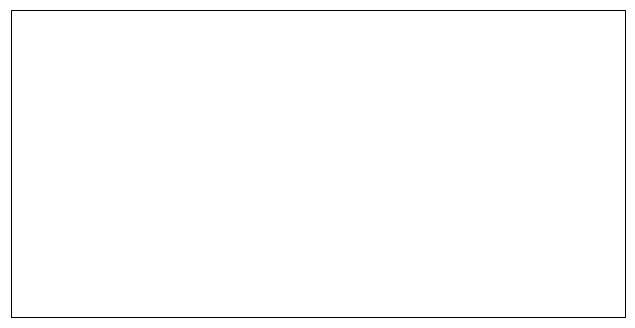

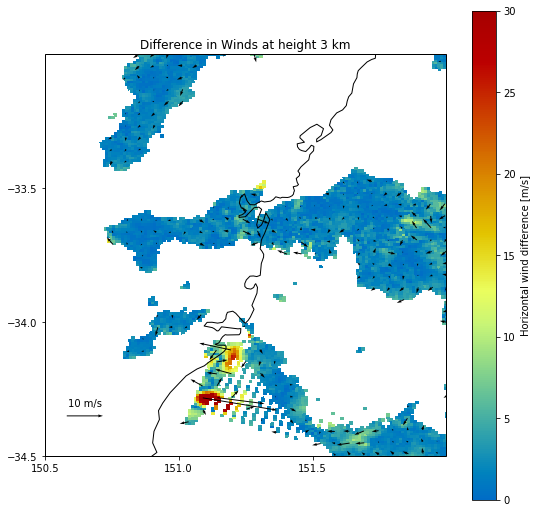

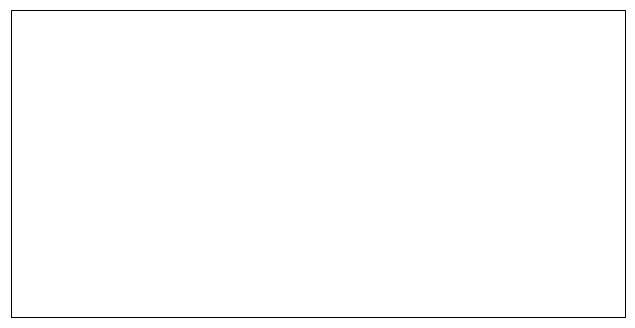

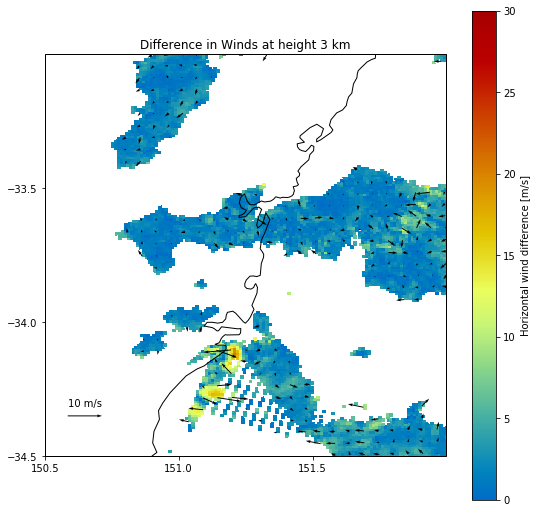

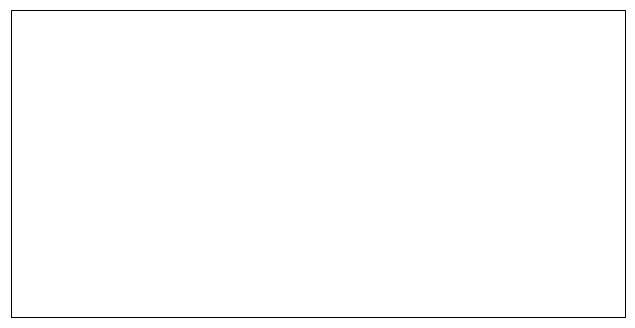

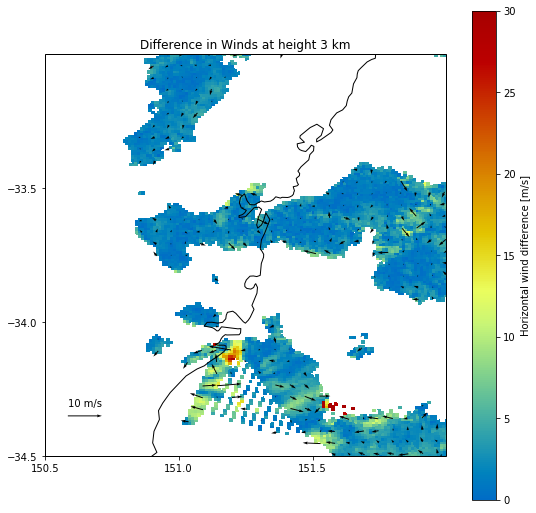

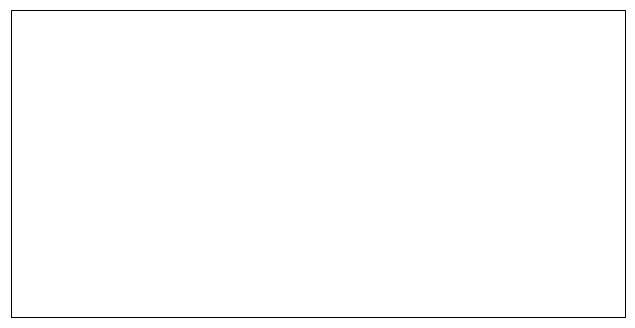

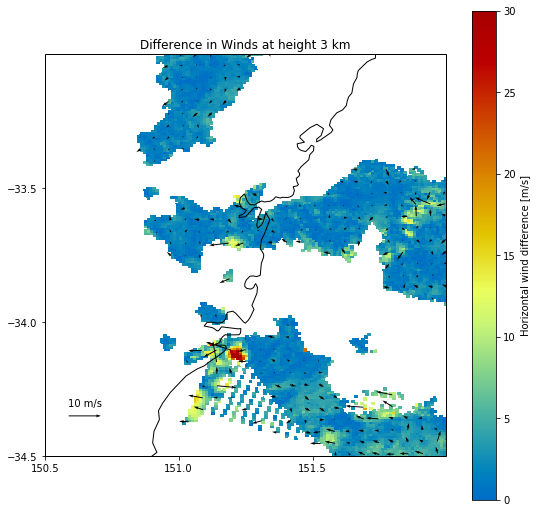

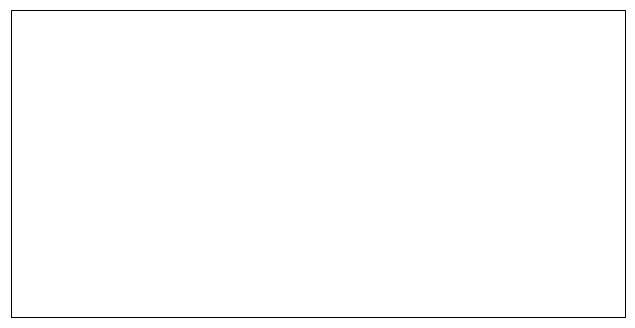

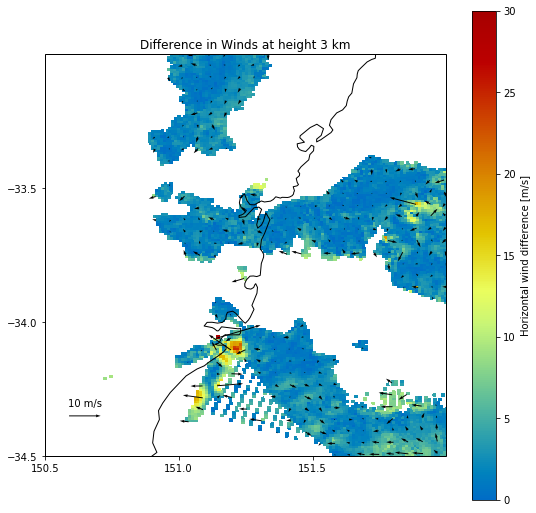

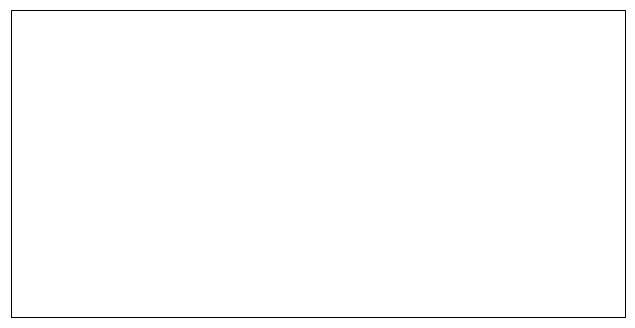

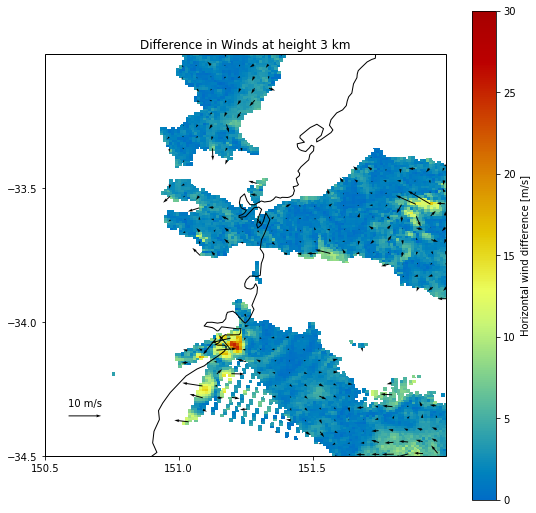

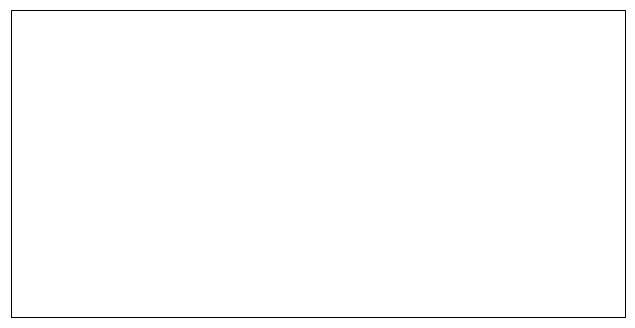

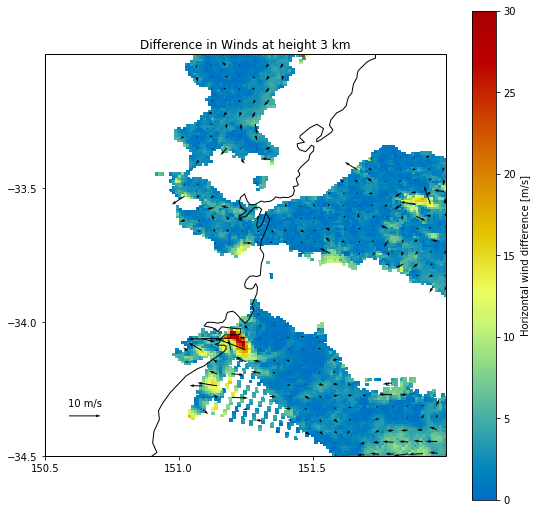

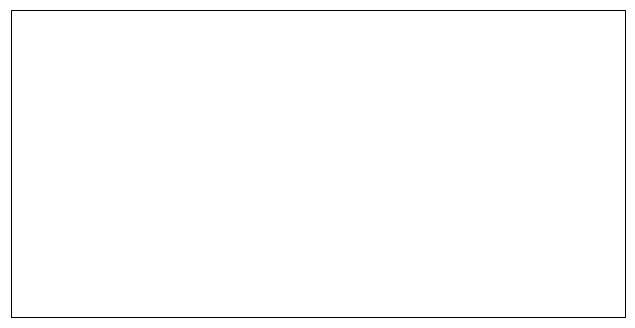

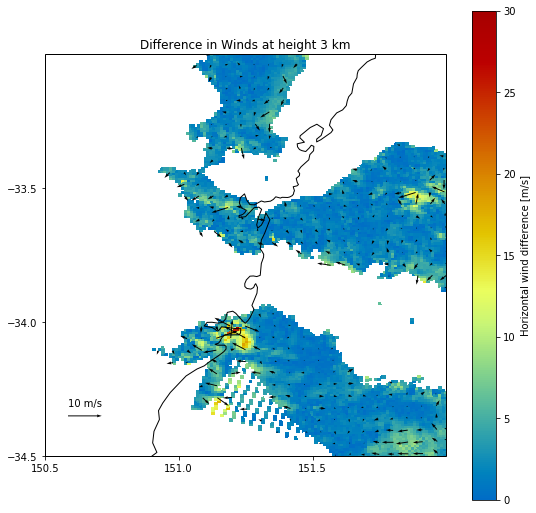

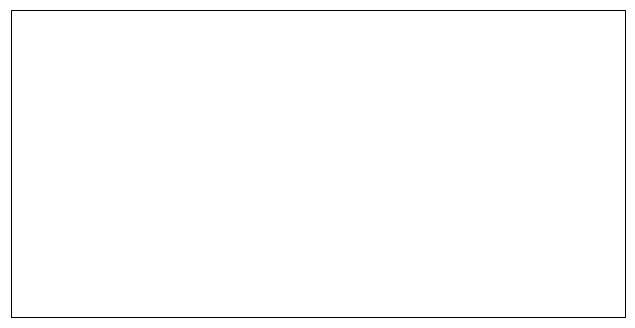

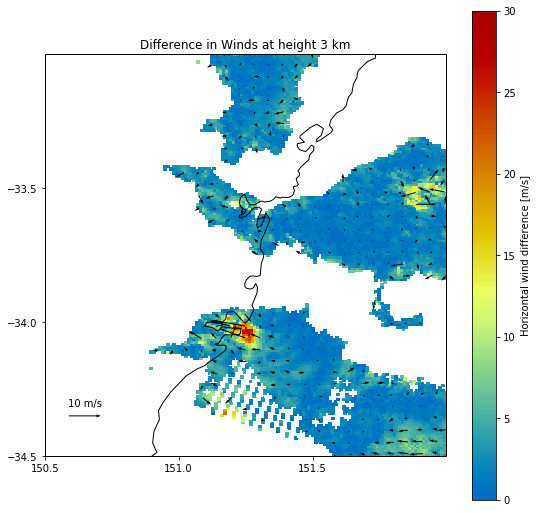

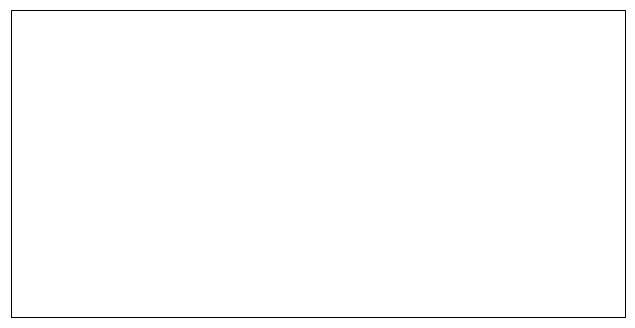

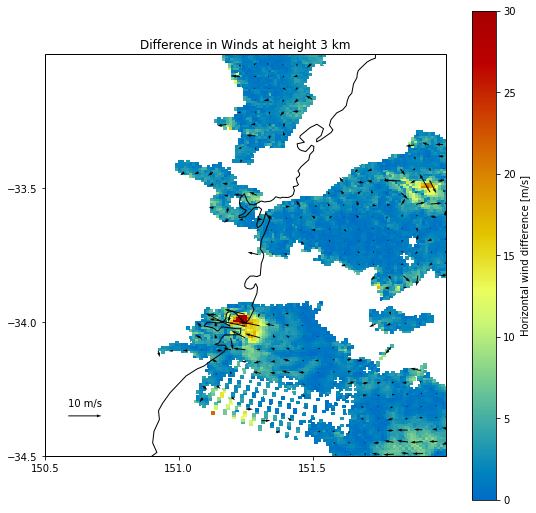

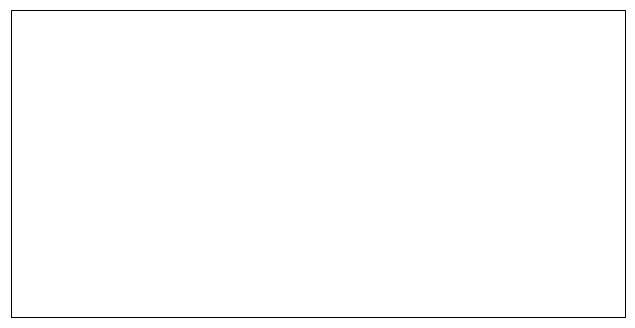

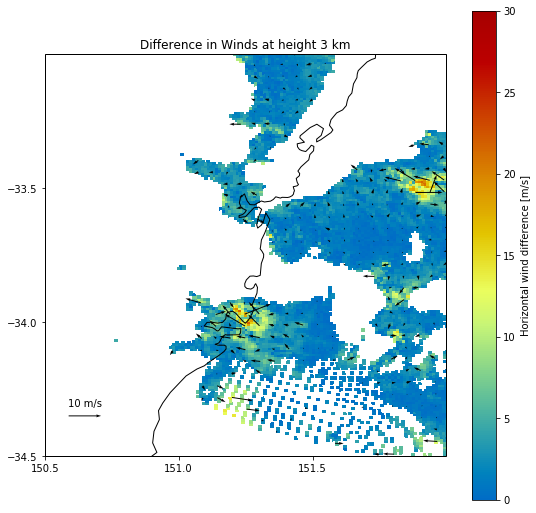

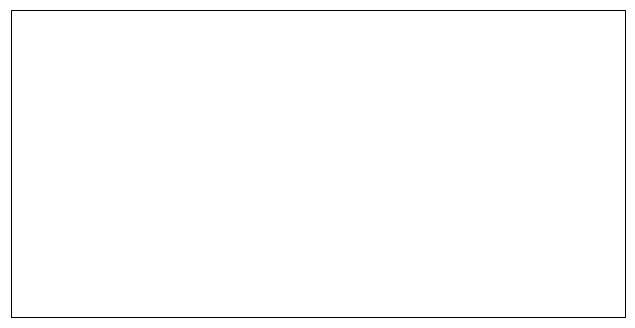

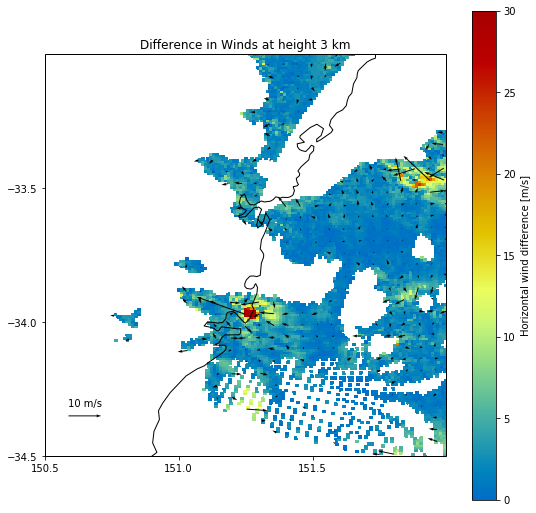

In [188]:
from scipy.interpolate import griddata
j = 0
for files in rad1_files:
    rad1 = pyart.io.read(files)
    rad_time = datetime.datetime.strptime(rad1.time['units'], 'seconds since %Y-%m-%dT%H:%M:%SZ')
    date_str = ("%04d" % rad_time.year + "%02d" % rad_time.month + "%02d" % rad_time.day +
                "%02d" % rad_time.hour + "%02d" % rad_time.minute + "%02d" % rad_time.second)

    grid1 = pyart.io.read_grid(grid_path + 'grid1' + date_str + '.nc')
    grid2 = pyart.io.read_grid(grid_path + 'grid2' + date_str + '.nc')
    grid3 = pyart.io.read_grid(grid_path + 'grid3' + date_str + '.nc')
    grid4 = pyart.io.read_grid(grid_path + 'grid4' + date_str + '.nc')

    fig = plt.figure(figsize=(11, 11))
    ax = plt.axes(projection=ccrs.PlateCarree())
    new_grids = [grid1, grid2, grid3, grid4]
    the_ds = xarray.open_dataset(file_list[j])
    grid_lon, grid_lat = np.meshgrid(the_ds.longitude.values, the_ds.latitude.values)
    
    u = the_ds.vx.values
    v = the_ds.vy.values
    w = the_ds.vz.values
    print(which_lat.shape)
    print(which_lon.shape)
    u = u[::5, :, :]
    v = v[::5, :, :]
    w = w[::5, :, :]
    u[u == -999] = np.nan
    v[v == -999] = np.nan
    w[w == -999] = np.nan
    u_new = np.zeros_like(new_grids[0].fields["u"]["data"])
    v_new = np.zeros_like(new_grids[0].fields["u"]["data"])
    w_new = np.zeros_like(new_grids[0].fields["u"]["data"])
    for i in range(16):
        u_new[i] = griddata((grid_lon.flatten(), grid_lat.flatten()), u[i].flatten(),
                            (new_grids[0].point_longitude["data"][i],new_grids[0].point_latitude["data"][i]),
                            method="nearest")
        v_new[i] = griddata((grid_lon.flatten(), grid_lat.flatten()), v[i].flatten(),
                            (new_grids[0].point_longitude["data"][i],new_grids[0].point_latitude["data"][i]),
                            method="nearest")
        w_new[i] = griddata((grid_lon.flatten(), grid_lat.flatten()), w[i].flatten(),
                            (new_grids[0].point_longitude["data"][i],new_grids[0].point_latitude["data"][i]),
                            method="nearest")                     
    diff_u = new_grids[0].fields["u"]["data"] - u_new
    diff_v = new_grids[0].fields["v"]["data"] - v_new
    mag_diff = np.sqrt(diff_u**2 + diff_v**2)
    vt = the_ds.Z_R1_INTERP.values[:,:,:]
    vt = np.ma.masked_where(vt == -999, vt)
    
    fig = plt.figure(figsize=(9,9))
    ax = plt.axes(projection=ccrs.PlateCarree())
    level=3
    grid_lon = new_grids[0].point_longitude["data"][i]
    grid_lat = new_grids[0].point_latitude["data"][i]
    ax.set_extent([grid_lon.min(), grid_lon.max(), grid_lat.min(), grid_lat.max()])
    mesh = ax.pcolormesh(grid_lon, grid_lat, mag_diff[level], cmap='pyart_HomeyerRainbow', vmin=0, vmax=30)
    q = ax.quiver(grid_lon[::5,::5], grid_lat[::5,::5], diff_u[level, ::5, ::5], diff_v[level, ::5, ::5], transform=ccrs.PlateCarree())
    plt.colorbar(mesh, ax=ax, label='Horizontal wind difference [m/s]')
    ax.coastlines(resolution='10m')
    ax.gridlines()
    ax.set_title(('Difference in Winds at height 3 km'))
    ax.quiverkey(q, 0.1, 0.1, 20, label='10 m/s')
    ax.set_xticks(np.arange(147, 152, 0.5))
    ax.set_yticks(np.arange(-37.5, -33.0, 0.5))
    ax.set_ylim([-34.5, -33.0])
    ax.set_xlim([150.5, 152.0])
    plt.savefig(('/lcrc/group/earthscience/rjackson/sydney_tornado/alain_retrieval_quicklooks/diff' + 
                 files[-16:-3] + '.png'))
    j += 1

/blues/gpfs/home/rjackson/anaconda3/envs/yt_devel/lib/python3.6/site-packages/matplotlib/contour.py:1173: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


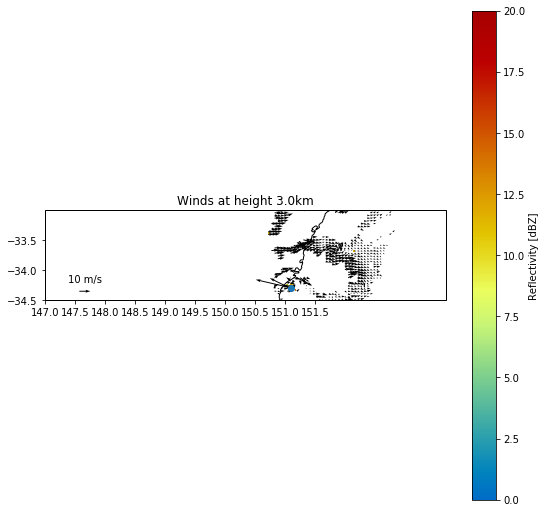

In [213]:
from scipy.ndimage.measurements import center_of_mass, label
the_ds = xarray.open_dataset(file_list[0])
grid_lon, grid_lat = np.meshgrid(the_ds.longitude.values, the_ds.latitude.values)
u = the_ds.vx.values
v = the_ds.vy.values
w = the_ds.vz.values
u = np.ma.masked_where(u == -999, u)
v = np.ma.masked_where(v == -999, v)
w = np.ma.masked_where(w < 10, w)
vt = the_ds.Z_R1_INTERP.values[:,:,:]
vt = np.ma.masked_where(vt == -999, vt)
fig = plt.figure(figsize=(9,9))
ax = plt.axes(projection=ccrs.PlateCarree())
level=14
ax.set_extent([grid_lon.min(), grid_lon.max(), grid_lat.min(), grid_lat.max()])
mesh = ax.pcolormesh(grid_lon, grid_lat, w[level], cmap='pyart_HomeyerRainbow', vmin=0, vmax=20)
q = ax.quiver(grid_lon[::5,::5], grid_lat[::5,::5], u[level, ::5, ::5], v[level, ::5, ::5], transform=ccrs.PlateCarree())
ax.contour(grid_lon, grid_lat, w[level], levels=[3,5,10])
plt.colorbar(mesh, ax=ax, label='Reflectivity [dBZ]')
ax.coastlines(resolution='10m')
ax.set_title(('Winds at height ' + str(the_ds.height.values[level]) + 'km'))
ax.quiverkey(q, 0.1, 0.1, 20, label='10 m/s')
ax.set_xticks(np.arange(147, 152, 0.5))
ax.set_yticks(np.arange(-37.5, -33.0, 0.5))
ax.set_ylim([-34.5, -33.0])

#    plt.savefig(('/lcrc/group/earthscience/rjackson/sydney_tornado/alain_retrieval_quicklooks/' + 
#                 file[-16:-3] + '.png'))



-32.933073547720994